In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 20.6 MB/s eta 0:00:00


In [ ]:
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=ac889061da77ba26c97572e602a1e9ad6180eeb1a65819ebe6e8940606cbdf32
  Stored in directory: /root/.cache/pip/wheels/40/75/01/e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt


In [ ]:
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle as pk
import tensorflow as tf
from transformers import BertTokenizer
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
%cd /content/drive/MyDrive/NLP/csv

/content/drive/.shortcut-targets-by-id/10jQIuTiIEwNUYyC2tiVRcsH1-ND-ng9R/NLP/csv


In [2]:
df=pd.read_csv("./csv/cleaned_resume_final.csv")

In [ ]:
all_text = ' '.join(df['cleaned_resume'])

In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)

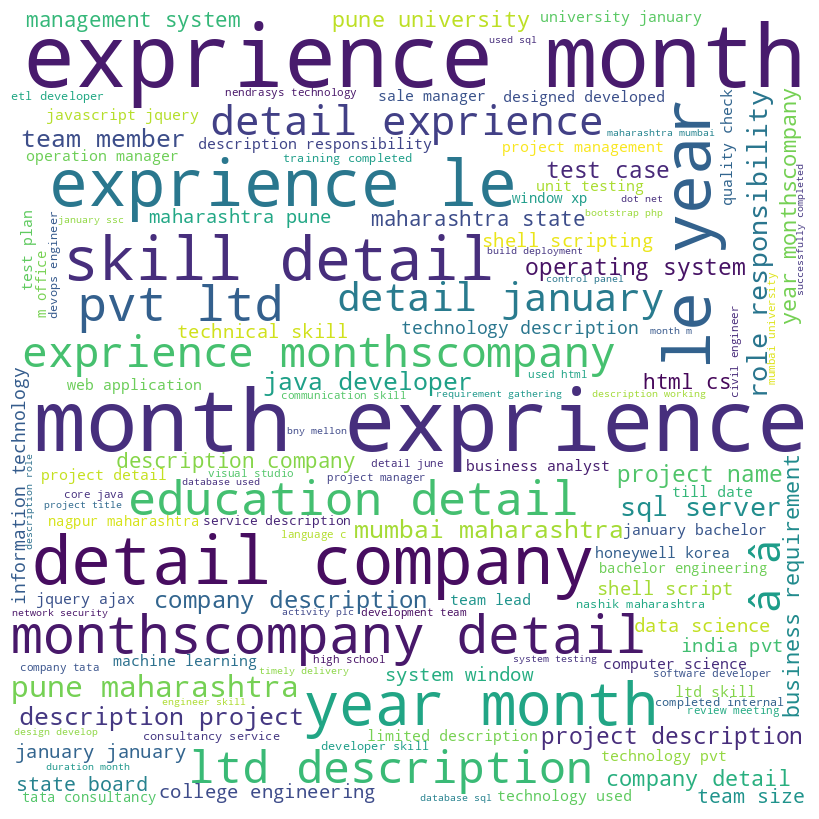

In [ ]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df['Category_no'] = df.groupby('Category').ngroup()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.cleaned_resume,
    df.Category_no,
    test_size = 0.2,
    random_state=2,
    stratify=df.Category_no
)

different models if derent embedding teqnique 

*   TFIDF-KNN - tfidf_knn.pkl
*   TFIDF-Gaussian naive bayes classifier - tfidf_gnb.pkl
*   TFIDF-Random forest - tfidf_rf.pkl
*   Word2vec KNN - word2vec_knn.pkl
*   word2vec RF - word2vec_RF.pkl 
*   word2Vec Gaussian naive bayes - Gword2vec_gnb.pkl
*   BERT - resume_classification_model




In [ ]:
resume_classification_model = tf.keras.models.load_model('resume_classification_model')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=df['Category'].unique()):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [ ]:
input_text = df['cleaned_resume'][0]
input_class=df['Category'][0]
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(resume_classification_model, processed_data=processed_data)
print(f"Actual  Category: {input_class}")
print(f"Predicted Category: {result}")

1/1 [==============================] - 3s 3s/step
Actual  Category: Data Science
Predicted Category: DevOps Mechanical Engineer


In [ ]:
class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=1, workers=4):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers

    def fit(self, X, y=None):
        sentences = [s.split() for s in X]
        self.word2vec_model = Word2Vec(sentences,
                                       vector_size=self.vector_size,
                                       window=self.window,
                                       min_count=self.min_count,
                                       workers=self.workers)
        return self

    def transform(self, X):
        X_transformed = []
        if isinstance(X, str):
            X = [X]
        for s in X:
            if isinstance(s, str):
                vec = [self.word2vec_model.wv[w] for w in s.split() if w in self.word2vec_model.wv]
                vec = np.mean(vec, axis=0) if vec else np.zeros(self.vector_size)
                X_transformed.append(vec)
        if not X_transformed:
            X_transformed = [np.zeros(self.vector_size)]
        return np.array(X_transformed)

In [ ]:
model =pk.load(open('/content/drive/MyDrive/NLP/pkl/word2vec_RF.pkl', 'rb'))

In [ ]:
test = []
test.append(df['Resume'][31])

y_pred_test = model.predict(test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])
print(df['Category'][31])

Category of predicted resume is :  Data Science
Data Science


##similarity demo 


In [ ]:
import docx2txt

In [ ]:
cd ..


/content/drive/.shortcut-targets-by-id/10jQIuTiIEwNUYyC2tiVRcsH1-ND-ng9R/NLP


In [ ]:
cd helper_function/

/content/drive/.shortcut-targets-by-id/10jQIuTiIEwNUYyC2tiVRcsH1-ND-ng9R/NLP/helper_function


In [ ]:
import preprocess_text as ps
import simlarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Job description

job_description = docx2txt.process("/content/drive/MyDrive/NLP/csv/sample_da_job2.docx")#please the correct path 

In [ ]:
job_description_tokenised =ps.preprocess_text([job_description])

In [ ]:
df_data_science = df.loc[df['Category']=='Data Science']

In [ ]:
df_data_science['Similarity_Percent']= simlarity.get_similarity(df_data_science['cleaned_resume'],job_description_tokenised,3)

In [ ]:
df_data_science = df_data_science.loc[:, ~df_data_science.columns.str.contains('^Unnamed')]

In [ ]:
df_data_science=df_data_science.drop_duplicates()

In [ ]:
df_data_science.sort_values(by='Similarity_Percent', ascending=False).head(10)

,Category,Resume,cleaned_resume,Category_no,Similarity_Percent
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill python tableau data visualization r stud...,5,1.000000
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,5,0.999830
9,Data Science,Expertise â Data and Quantitative Analysis â...,expertise data quantitative analysis decision ...,5,0.999672
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,education detail rayat bahra institute enginee...,5,0.999153
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skill c basic iot python matlab data science m...,5,0.998809
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,5,0.998371
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,5,0.998355
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,personal skill ability quickly grasp technical...,5,0.951129
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may data scientist data s...,5,0.000000
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,5,0.000000


In [ ]:
pip install rbo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rbo import rbo


In [ ]:
#give this a complete job resume 
java_desc = "Job Description  Synergistic ITis an organization focusing on Java/J2EE domain and providing technically skilled and competent candidates to clients in Northern America and Canada since 2010. From staffing to full implementation of projects we provide the highest quality IT Services. Job Overview- As a Web programmer, you should write clean code to ensure our programs run properly and address our company needs. You'll be responsible for designing, coding and improving web pages, programs, and applications. Position-  · Executing full lifecycle software development  · Long term positions with excellent pay rates.  · No relocation  · Active positions with Fortune 500 Clients  · Able to convert our company needs in functional and user-friendly websites and programs  · Salary ranging $75K-$100K/yr.  The Requirements-  · BS/MS/AS in CS/IT/CE  · Ability to perform in a team environment  · Positive attitude with good comm. Skills  · Familiarity working with C, C++, Core Java etc"

In [ ]:
job_desc_pp = ps.preprocess_text([job_description])

In [ ]:
javaresumes = pd.read_csv('/content/drive/MyDrive/NLP/csv/sampled_jave_resumes.csv')# change this to relative path


In [ ]:
javaresumes.head()

,Category,Resume
0,Java Developer,Eleanor Mccartney\n\n4522 Davisson Street\nRus...
1,Java Developer,Curtis Samuel (123) 456-7890 csamuel@example.c...
2,Java developer,SWATHI RUCHIRA\nView Portfolio mswathi.ruchira...
3,Java Developer,"SOHA VANKUDRE\nBoston, MA | Ph: +1(857)-381-54..."
4,Java Developer,Venkata Bhargavi S\nBoston MA • (339) 224-1508...


In [ ]:
javaresumes['resume_cleaned'] = javaresumes['Resume'].apply(ps.clean_text)

In [ ]:
javaresumes.head()

,Category,Resume,resume_cleaned
0,Java Developer,Eleanor Mccartney\n\n4522 Davisson Street\nRus...,eleanor mccartney 4522 davisson street rushvil...
1,Java Developer,Curtis Samuel (123) 456-7890 csamuel@example.c...,curtis samuel 123 456-7890 csamuel example.com...
2,Java developer,SWATHI RUCHIRA\nView Portfolio mswathi.ruchira...,swathi ruchira view portfolio mswathi.ruchira ...
3,Java Developer,"SOHA VANKUDRE\nBoston, MA | Ph: +1(857)-381-54...",soha vankudre boston ph +1 857 -381-5447 vanku...
4,Java Developer,Venkata Bhargavi S\nBoston MA • (339) 224-1508...,venkata bhargavi boston • 339 224-1508 • sikha...


In [ ]:
javaresumes['Similarity_Percent']= simlarity.get_similarity(javaresumes['resume_cleaned'],job_desc_pp,3)

In [ ]:
javaresumes=javaresumes.sort_values(by='Similarity_Percent', ascending=False)

In [ ]:
ranked_resumes = np.array(javaresumes.index)

In [ ]:
# Defining the ground truth ranking
ground_truth = np.array([0, 1, 3, 4, 5, 7, 2, 8, 6, 9])

In [ ]:
rbo.RankingSimilarity(ranked_resumes, ground_truth).rbo()

0.42892857142857144